Pytorch Classifier

In [10]:
# Importing dependencies
import tensorflow as tf
#from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from art.estimators.classification import PyTorchClassifier
from art.attacks.evasion import FastGradientMethod
from art.utils import load_mnist

# Disabling eager execution from TF 2 
tf.compat.v1.disable_eager_execution()

# Increasing Matplotlib font size
matplotlib.rcParams.update({"font.size": 14})

In [11]:
# Step 1a: Swap axes to PyTorch's NCHW format
(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

x_train = np.transpose(x_train, (0, 3, 1, 2)).astype(np.float32)
x_test = np.transpose(x_test, (0, 3, 1, 2)).astype(np.float32)

# Step 2: Create the model
# Step 1: Load the MNIST dataset



In [12]:

import torch.nn as nn
import torch.nn.functional as F

def Flatten(x):
    return x.reshape(x.shape[0], -1) 


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc_1 = nn.Linear(in_features=28*28, out_features=200)
        self.fc_2 = nn.Linear(in_features=200, out_features=100)
        self.fc_3 = nn.Linear(in_features=100, out_features=100)
        self.fc_4 = nn.Linear(in_features=100, out_features=10)

    def forward(self, x):
        x = Flatten(x)
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        x = F.relu(self.fc_3(x))
        x=self.fc_4(x)
        return x

model = Net()

# Step 2a: Define the loss function and the optimizer
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 3: Create the ART classifier

classifier = PyTorchClassifier(
    model=model,
    clip_values=(min_pixel_value, max_pixel_value),
    loss=criterion,
    optimizer=optimizer,
    input_shape=(1, 28, 28),
    nb_classes=10,
)


In [13]:

classifier.fit(x_train, y_train, batch_size=64, nb_epochs=3)

# Step 5: Evaluate the ART classifier on benign test examples

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on test examples: {}%".format(accuracy * 100))


Accuracy on test examples: 96.09%


In [14]:
# Step 6: Generate adversarial test examples
attack = FastGradientMethod(estimator=classifier, eps=0.2)
x_test_adv = attack.generate(x=x_test)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 10.48%


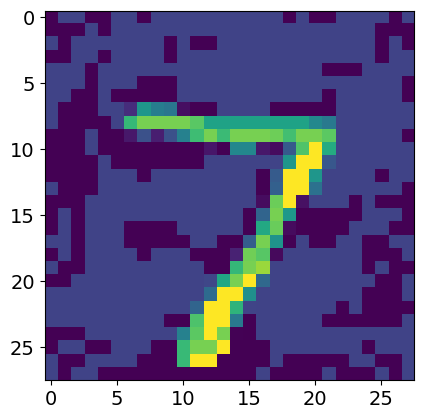

In [16]:
plt.imshow(X=x_test_adv[0].squeeze())

ImportError: cannot import name 'visualise' from 'art.utils' (C:\Users\Darshan Mourya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\art\utils.py)